In [1]:
import pandas as pd
import numpy as np

from numpy import average


#import the csv to pandas
file_path='/home/itay/salarySurvey/data/All_the_survey_data_orginized_filtered.xlsx'
df =pd.read_excel(file_path)



In [2]:
# enter the coulmns names as varibels:

salary='שכר שעתי במשרת הסטודנט הראשונה (ש"ח לשעה)'
grade='ממוצע (נכון לתקופת חיפוש העבודה)'
bargin='האם התמקחת אחרי קבלת ההצעה?'
gender='מין'
company='חברה (נא לכתוב באנגלית את שם החברה)'
courses='קורסי מפתח שעשית לפני הצעת העבודה'

ice_cream='טעם גלידה אהוב'

rounding_density=2

In [3]:
#cleanup to the data, you should add your own cleanup to the data:
#df=df.drop(65)
#df=df.drop(82)
#df=df.drop(104)
#df=df.drop(117)
#
#df[df[salary].str.contains("50K",na=False)]
#df=df.drop(102)
#
#df[df[salary]=='20']
#df=df.drop(148)
#
#df[df[grade].str.contains(" תואר ראשון",na=False)]
#df=df.drop(115)



In [4]:
av_df=df[salary].astype(float).sum()/len(df)
av_df

93.59248554913295

In [5]:
#calculate the average value of columnName column in df:
def calculate_average(df,column_name):
    num_of_rows=len(df)
    sum_of_rows=df[column_name].astype(float).sum()
    return sum_of_rows/num_of_rows # return the average value

def calculate_precentage_of_binary_answer(df,column_name,binary_field_answer):
    return len(df[df[column_name]==binary_field_answer])/ len(df)

def create_sorted_average_dict(dict,field):
    average_dict={}
    sorted_dict={}
    #calculate the average:
    for name in dict:
        average_dict[name]=calculate_average(dict[name],field)

    #sort:
    sorted_salary_list=sorted(average_dict.items(), key=lambda x: x[1])

    for tup in sorted_salary_list:
        average_rounded=round(tup[1],rounding_density)
        new_key= tup[0]+" "+str(average_rounded)
        sorted_dict[new_key]=tup[1] 
    return sorted_dict

In [6]:
#calculate average salary and grades:

male_df= df.loc[df[gender]=='זכר']
female_df= df.loc[df['מין']=='נקבה']

average_salary_male = calculate_average(male_df,salary)
average_grade_male = calculate_average(male_df,grade)

average_salary_female = calculate_average(female_df,salary)
average_grade_female = calculate_average(female_df,grade)


In [7]:
#bargin presentage:

precents_of_male_bargin=calculate_precentage_of_binary_answer(male_df,bargin,'כן')
precents_of_female_bargin=calculate_precentage_of_binary_answer(female_df,bargin,'כן')

bargin_m=male_df[male_df[bargin]=='כן']
n_bargin_m=male_df[male_df[bargin]=='לא']
bargin_f=female_df[female_df[bargin]=='כן']
n_bargin_f=female_df[female_df[bargin]=='לא']


print("bargin man avreage salary: "+str(calculate_average( bargin_m,salary)))
print("didn't bargin man avreage salary: "+str(calculate_average( n_bargin_m,salary)))
print("bargin woman avreage salary: "+str(calculate_average( bargin_f,salary)))
print("didn't bargin woman avreage salary: "+ str(calculate_average(n_bargin_f,salary)))


bargin man avreage salary: 93.53399999999999
didn't bargin man avreage salary: 94.4525
bargin woman avreage salary: 91.04347826086956
didn't bargin woman avreage salary: 91.9


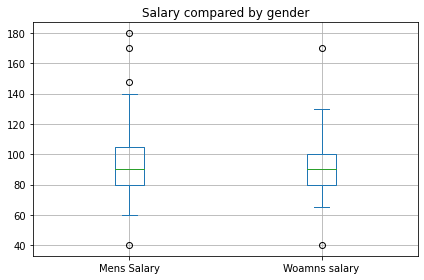

In [8]:
import matplotlib.pyplot as plt
man_salarys=male_df[[salary]].astype(float)
fman_salarys=female_df[[salary]].astype(float)

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
combined_dfs = pd.DataFrame({"Mens Salary": male_df[salary].astype(float), "Woamns salary": female_df[salary].astype(float)})

# Plot the dataframe
ax = combined_dfs[['Mens Salary', 'Woamns salary']].plot(kind='box',grid=True,title='Salary compared by gender')

# Display the plot
plt.show()

In [9]:
#get outliers cleaned for the scatter point:
scatter_df=df
scatter_df[scatter_df[salary]>160]
scatter_df=scatter_df.drop(343)
scatter_df=scatter_df.drop(344)
scatter_df=scatter_df.drop(345)
scatter_df[scatter_df[salary]<59]
scatter_df=scatter_df.drop(0)
scatter_df=scatter_df.drop(1)

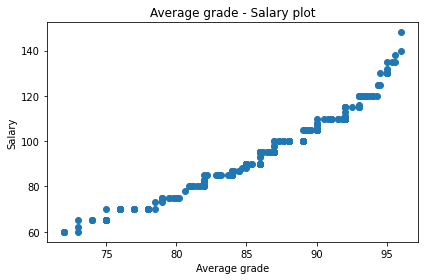

In [10]:
#prepare the scatter points:
x=scatter_df[grade].astype(float)
y=scatter_df[salary].astype(float)
plt.scatter(x,y)
plt.title("Average grade - Salary plot")
plt.xlabel("Average grade")
plt.ylabel("Salary")
plt.show()

In [11]:
#calculate num of exmples from each company:
temp_df=df
num_of_examples={}
companies_names=['Intel','Microsoft','Amazon','Google','Facebook','Apple','IBM','Rafael','Elbit','Plus500','Nvidia','Mobileye']
for company_name in companies_names:
        num_of_examples[company_name]=len(temp_df[temp_df[company]==company_name])
print(num_of_examples)


{'Intel': 77, 'Microsoft': 20, 'Amazon': 22, 'Google': 2, 'Facebook': 5, 'Apple': 13, 'IBM': 10, 'Rafael': 35, 'Elbit': 14, 'Plus500': 2, 'Nvidia': 12, 'Mobileye': 7}


In [12]:
#get the calculate companies average:

from cmath import nan


companies_dict={}
companies_names=['Intel','Microsoft','Amazon','Facebook','Apple','IBM','Rafael','Elbit','Nvidia','Mobileye']

for company_name in companies_names:
    companies_dict[company_name]=df[df[company]==company_name]

In [13]:

sorted_salaries_companies=create_sorted_average_dict(companies_dict,salary)


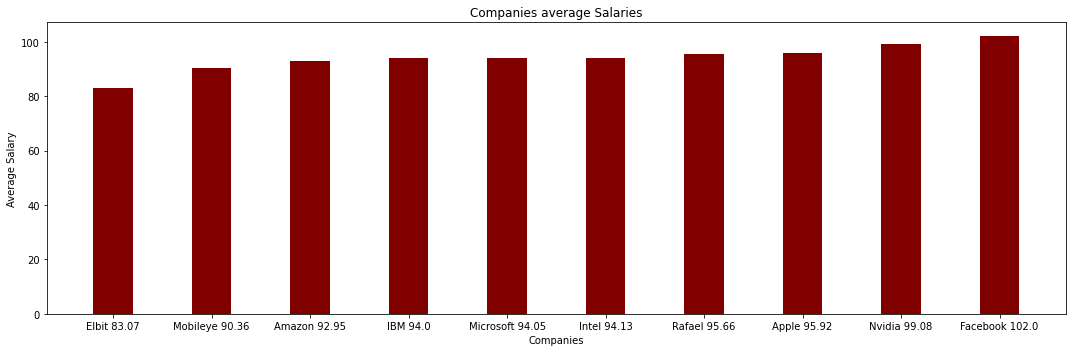

In [14]:
fig=plt.figure(figsize=(15,5))
plt.bar(sorted_salaries_companies.keys(), sorted_salaries_companies.values(), color ='maroon',
        width = 0.4)
 
plt.xlabel("Companies")
plt.ylabel("Average Salary")
plt.title("Companies average Salaries")
plt.show()


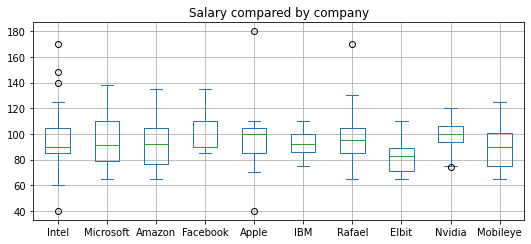

In [15]:
# box plot by company:

import matplotlib.pyplot as plt

for current_company in companies_dict:
    current_df=companies_dict[current_company]
    companies_dict[current_company]=(current_df[salary]).astype(float)

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
#combined_dfs = pd.DataFrame({"Intel": companies_dict["Intel"].astype(float), "Mobilay": companies_dict["Mobileye"].astype(float)})
combined_dfs=pd.DataFrame(companies_dict)
# Plot the dataframe
ax = combined_dfs.plot(kind='box',grid=True,title='Salary compared by company')

# Display the plot
plt.show()

In [16]:
ice_cream_df_dict={}
ice_ceam_names=['למרק - חולמ הלגייב','פיסטוק','וניל עוגיות','בצק עוגיות','שוקולד בראוניס']

for ice_cream_name in ice_ceam_names:
    ice_cream_df_dict[ice_cream_name]=df[df[ice_cream]==ice_cream_name]    

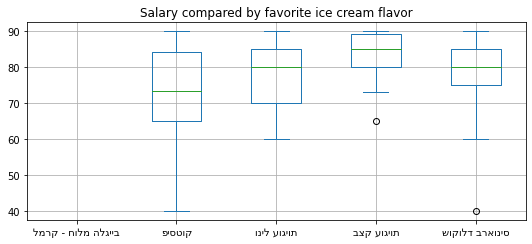

In [17]:
import matplotlib.pyplot as plt


for flavor in ice_cream_df_dict:
    c_df=ice_cream_df_dict[flavor]
    ice_cream_df_dict[flavor]=(c_df[salary]).astype(float)

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
#combined_dfs = pd.DataFrame({"Intel": companies_dict["Intel"].astype(float), "Mobilay": companies_dict["Mobileye"].astype(float)})
combined_dfs=pd.DataFrame(ice_cream_df_dict)
# Plot the dataframe
ax = combined_dfs.plot(kind='box',grid=True,title='Salary compared by favorite ice cream flavor')

# Display the plot
plt.show()

In [18]:
sorted_salaries_companies=create_sorted_average_dict(ice_cream_df,salary)


NameError: name 'ice_cream_df' is not defined

In [ ]:
print(sorted_salaries_companies)

{'למרק - חולמ הלגייבnan': nan, 'פיסטוק73.76': 73.76190476190476, 'וניל עוגיות77.85': 77.84782608695652, 'שוקולד בראוניס78.79': 78.79310344827586, 'בצק עוגיות83.37': 83.37307692307692}


In [19]:
mtm='מת"מ'
mivni='מבני נתונים'
operation_s='הפעלה'
algo='אלגו'
additonal_courses='קורס בחירה הקשור לתחום (מבוא ללומדות / הגנה ברשתות ..)'

df_by_courses={}
courses_names=[mtm,mivni,operation_s,algo,additonal_courses]

for course in courses_names:
    df_by_courses[course] = df.loc[df[courses].str.contains(course,na=False)]

/home/itay/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  # This is added back by InteractiveShellApp.init_path()


In [20]:
create_sorted_average_dict(dict=df_by_courses,field= salary)

{'מת"מ':                   Timestamp מסלול לימודים  באיזה סמסטר היית כשקיבלת את ההצעה?  \
 0   2022-08-16 12:37:33.926         מדמ"ח                                 4.0   
 1   2022-08-16 12:39:01.917         מדמ"ח                                 3.0   
 2   2022-08-16 12:41:55.154  הנדסת מחשבים                                 6.0   
 4   2022-08-16 12:42:08.834  הנדסת מחשבים                                 3.0   
 5   2022-08-16 12:42:41.477         מדמ"ח                                 5.0   
 ..                      ...           ...                                 ...   
 340 2021-09-22 15:59:15.636         מדמ"ח                                 4.0   
 341 2021-09-22 16:15:01.805         מדמ"ח                                 3.0   
 343 2021-09-22 22:23:48.842         מדמ"ח                                 5.0   
 344 2021-09-23 00:12:33.891         מדמ"ח                                 4.0   
 345 2021-09-23 09:55:16.798         מדמ"ח                                 5.0   
 
      

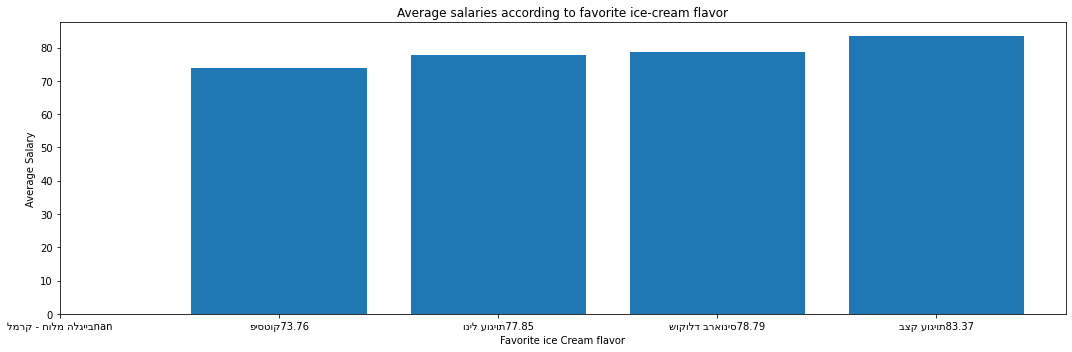

In [ ]:
#bar plot:

data = sorted_salaries_companies
names = list(data.keys())
values = list(data.values())
fig=plt.figure(figsize=(15,5))



plt.xlabel("Favorite ice Cream flavor")
plt.ylabel("Average Salary")
plt.title("Average salaries according to favorite ice-cream flavor")
plt.bar(range(len(data)), values, tick_label=names)
plt.show()